In [132]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from category_encoders import BinaryEncoder

# resampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Split Data & Validation
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metric Selection
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## Business Problem Understanding

**SUMMARY**

Perusahaan PT Bank Indonesia Jaya ingin mengembangkan sektor perbankan mereka di bidang deposito berjangka. Hal ini dikarenakan, ketika seorang nasabah memilih produk deposito berjangka, mereka akan menyimpan uang dalam jangka waktu yang lama dengan jumlah uang yang disetorkan konstan. Uang tersebut akan digunakan oleh bank untuk berinvestasi dalam produk keuangan dengan harapan mendapatkan keuntungan lebih tinggi. Namun, tidak semua nasabah yang dimiliki oleh PT Bank Indonesia Jaya memiliki potensi untuk mengambil deposito berjangka. Oleh karena itu, peran data science sangat diperlukan untuk mengidentifikasi nasabah yang memiliki peluang lebih tinggi untuk berlangganan deposito berjangka dan memfokuskan upaya pemasaran pada klien-klien tersebut.               

**TARGET**

- 1: Nasabah yang akan mengambil produk deposito berjangka
- 0: Nasabah tidak mengambil produk deposito berjangka

- FP: nasabah yang tidak mengambil deposito berjangka diprediksi mengambil deposito berjangka --> membuang-buang waktu untuk menjelaskan karena nasabah tersebut tidak tertarik untuk mengambil produk keuangan tersebut
- FN: nasabah yang akan mengambil deposito berjangka diprediksi tidak akan mengambil deposito berjangka --> bank akan merugi karena akan kehilangan nasabah yang akan menabung secara konstan karena ketidaktauan informasi tersebut

**METRIC**

Dalam permasalahan bisnis PT Bank Indonesia Jaya, metrik yang sesuai adalah **F2 score**

Alasannya metrik ini memberikan lebih banyak bobot pada recall daripada presisi, sehingga lebih sensitif terhadap false negative. Dengan menggunakan F2 score, akan menekankan pentingnya mengidentifikasi nasabah yang akan mengambil deposito berjangka secara akurat untuk menghindari kerugian bagi bank.

**PROBLEM**

Bank memiliki ribuan bahkan puluhan data nasabah yang terdeftar, ketika pihak bank ingin menawarkan salah satu produk keuangan mereka kepada nasabah akan sangat tidak efektif jika harus menghubungi seluruh nasabah tersebut, dikarenakan nasabah tersebut belum tentu akan mau mengambil produk keuangan yang sedang ditawarkan.

**GOALS**

Dari permasalahan yang ada tersebut, pihak bank ingin mengefisienkan waktu pihak marketing ketika ingin menawarkan produk keuangan, karena waktunya akan singkat dan dapat mengenai target marketing dengan tepat sasaran dengan  mengidentiikasi nasabah yang tidak dan memiliki potensi untuk mengambil deposito berjangka.

**Analytic Approach**

- Yang akan dilakukan adalah menganalisis data dan menemukan pola pada machine learning berbasis klasifikasi untuk membedakan nasabah mana yang akan berpotensi mengambil deposito berjangka dan mana yang tidak, sehingga nasabah lama dan nasabah baru dapat diidentifikasi dengan mudah.


**Berikut adalah penjelasan mengenai setiap fitur yang terdapat dalam data:**

1. Age: Umur nasabah dalam tahun (numerik)
2. Job: Jenis pekerjaan nasabah (kategori)
3. Balance: Saldo nasabah dalam akun (numerik)
4. Housing: Apakah nasabah memiliki pinjaman perumahan? ("yes" atau "no")
5. Loan: Apakah nasabah memiliki pinjaman pribadi? ("yes" atau "no")
6. Contact: Metode kontak yang digunakan (misalnya "cellular" untuk telepon seluler, "telephone" untuk telepon rumah) (kategori)
7. Month: Bulan saat nasabah terakhir kali dihubungi dalam tahun ini (kategori)
8. Campaign: Jumlah kontak yang dilakukan selama kampanye ini kepada nasabah (numerik)
9. Pdays: Jumlah hari yang berlalu sejak nasabah terakhir kali dihubungi dalam kampanye sebelumnya (-1 menunjukkan nasabah tidak pernah dihubungi sebelumnya aau telah dihubungi namun nasabah tidak mengangkat panggilan) (numerik)
10. Poutcome: Hasil dari kampanye pemasaran sebelumnya (kategori)
11. Deposit: Apakah nasabah melakukan deposito? ("yes" atau "no")

# **LOAD DATASET**

In [133]:
# Read the Excel file
data = pd.read_csv('data_bank_marketing_campaign.csv')
data['poutcome'].value_counts()
data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


# **DATA UNDERSTANDING**

In [134]:
data.info()
# Insight: - Pada data ini tidak memiliki missing value
#          - Dtype seluruh kolom telah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [135]:
# Mencari nilai unik dari setiap kolom
category_features = data.select_dtypes(include=['object', 'int']).columns.values
for col in category_features:
    print(20 * '-')    
    print(data[col].value_counts(), "\n")
    
print(data.nunique(axis=1))

# Insight: Pada beberapa column terdapat nilai value unknown, yaitu pada kolom job,contact, dan poutcome
# yang nantinya value ini akan diubah menjadi NaN dan di handle sebagai missing value

--------------------
age
31    351
32    344
30    329
35    324
33    317
     ... 
93      2
86      2
90      2
92      1
95      1
Name: count, Length: 75, dtype: int64 

--------------------
job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64 

--------------------
balance
0       546
1        28
3        21
2        20
5        17
       ... 
1920      1
4101      1
824       1
4654      1
5473      1
Name: count, Length: 3153, dtype: int64 

--------------------
housing
no     4140
yes    3673
Name: count, dtype: int64 

--------------------
loan
no     6789
yes    1024
Name: count, dtype: int64 

--------------------
contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64 

--------------------
month
may    1

# **DATA CLEANING**

In [136]:
# Replace yes no pada kolom deposit menjadi 1 dan 0 karena pada train test machine learning tidak dapat memproses value target yang masih berbentuk kategorikal
data['deposit'].replace('yes',1,inplace=True)
data['deposit'].replace('no',0,inplace=True)

In [137]:
# Find duplicated rows
duplicated_rows = data[data.duplicated()]

duplicated_rows

# Insight: Dari pencarian data duplikat ternyata pada data ini terdapat 8 jenis data yang sama persis (duplikat)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,0
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,0
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,0
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1


In [138]:
# Drop duplikat, karena ketika duplikat berada di dataset training dan test sekaligus maka terjadi leak information pada model machine learning
data.drop_duplicates(keep='first', inplace=True, ignore_index=False)

# HANDLE MISSING VALUE

In [139]:
# Change 'unknown' To 'NaN'

data.replace('unknown',np.nan,inplace=True)
data.isna().sum()/len(data)*100

age          0.000000
job          0.691864
balance      0.000000
housing      0.000000
loan         0.000000
contact     20.960922
month        0.000000
campaign     0.000000
pdays        0.000000
poutcome    74.452274
deposit      0.000000
dtype: float64

**Insight:**

Setelah mengganti nilai unknown menjadi NaN ternyata ada beberapa kolom yang memiliki sangat banyak missing value bahkan ada yang sampai 74%, masing-masing kolom yang memiliki missing value akan di handle per kolom sesuai karakteristiknya, jadi tidak menggunakan imputer karena ditakutkan adanya bias 

**KOLOM JOB**

In [140]:
# Handle missing value kolom Job, pada kolom ini memiliki missing value paling sedikit yaitu sebesar 0.69%
job_unknown = data[pd.isna(data['job'])]
print(f"Jumlah data dengan kolom job bernilai NaN: {job_unknown['age'].count()}")
job_unknown

Jumlah data dengan kolom job bernilai NaN: 54


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
103,45,NaN,356,no,no,cellular,aug,2,-1,NaN,0
110,41,NaN,1567,no,no,cellular,jul,2,-1,NaN,0
332,48,NaN,3,no,no,cellular,aug,2,-1,NaN,0
902,60,NaN,17297,no,no,cellular,aug,11,-1,NaN,1
981,57,NaN,19268,no,no,NaN,oct,1,-1,NaN,1
1039,58,NaN,1547,no,no,telephone,aug,4,-1,NaN,1
1073,48,NaN,558,no,no,cellular,aug,6,-1,NaN,0
1079,55,NaN,2206,no,no,cellular,aug,1,91,success,1
1142,53,NaN,549,no,no,telephone,jan,2,-1,NaN,0
1230,26,NaN,3247,no,no,telephone,feb,3,-1,NaN,0


In [141]:
# Setelah mengetahui terdapat 54 data yang memiliki nilai NaN pada kolom job, selanjutnya mencari karakteristik apa yang dimiliki dari data tesebut

# Karakteristik kolom balance
sorted_data = job_unknown['balance'].value_counts().sort_index(ascending=False)
sorted_data


balance
19268    1
17297    1
8564     1
7687     1
6929     1
5361     1
4717     1
4465     1
3247     1
3237     1
2443     1
2235     1
2206     2
1880     1
1567     1
1547     1
1541     1
1517     1
1187     1
1157     1
942      2
895      1
779      1
732      1
677      1
634      1
558      2
549      1
526      1
406      1
397      2
390      1
356      1
341      2
335      1
222      1
194      1
179      1
111      1
68       1
44       1
27       1
3        2
0        5
Name: count, dtype: int64

**Insight:**

Kolom job yang memiliki nilai NaN ternyata memiliki jumlah saldo di bank yang beragam, dari saldo 0 hingga 19268. Selanjutnya, akan dilihat apakah saldo tersebut dapat dikelompokan terhadap saldo nasabah yang diketahui pekerjaannya

In [142]:
# data[data['job']=='management']['balance'].max()

job=data['job'].value_counts()
job
for job_category, count in job.items():
    jumlah=data[data['job']==job_category]
    max_balance = jumlah['balance'].max()
    min_balance = jumlah['balance'].min()
    print(f"{job_category}\n Saldo terkecil = {min_balance}\n Saldo terbesar={max_balance}")

management
 Saldo terkecil = -6847
 Saldo terbesar=36252
blue-collar
 Saldo terkecil = -1489
 Saldo terbesar=66653
technician
 Saldo terkecil = -1944
 Saldo terbesar=45248
admin.
 Saldo terkecil = -1386
 Saldo terbesar=22086
services
 Saldo terkecil = -1139
 Saldo terbesar=23592
retired
 Saldo terkecil = -1206
 Saldo terbesar=37127
self-employed
 Saldo terkecil = -3058
 Saldo terbesar=52587
unemployed
 Saldo terkecil = -825
 Saldo terbesar=13818
student
 Saldo terkecil = 0
 Saldo terbesar=23878
entrepreneur
 Saldo terkecil = -1965
 Saldo terbesar=51439
housemaid
 Saldo terkecil = -1531
 Saldo terbesar=26965


**Insight:**

Setelah mengetahui range saldo per masing-masing jenis pekerjaan, ternyata tidak ada pekerjaan yang meiliki rentang yang berbeda satu sama lain, karena rentang dari dari seluruh pekerjaan hampir semuanya tersebar, jadi apabila data yang tidak diketahui jenis pekerjaan diisi berdasarkan saldo yang disesuaikan dengan data yang sudah diketahui pekerjaannya akan menimbulkan bias.

In [143]:
# Karakteristik Kolom poutcome
print(job_unknown['poutcome'].value_counts())
print("-------------------------------------")
job_poutcome_unknown=job_unknown[pd.isna(job_unknown['poutcome'])]
print(f"Jumlah data job_unknown yang memiliki nilai NaN pada kolom poutcome adalah: {job_poutcome_unknown['age'].count()}")

poutcome
success    7
failure    7
Name: count, dtype: int64
-------------------------------------
Jumlah data job_unknown yang memiliki nilai NaN pada kolom poutcome adalah: 40


**Insight:**

Dari total 54 baris data yang memiliki nilai NaN pada kolom job yang memiliki nilai pada kolom poutcome hanya 14, berarti 3/4 nya memiliki nilai NaN,
hal ini menandakan banyak data yang pada kolom job memiliki nilai NaN,juga memiliki NaN pada kolom poutcome. 

**ANALISIS**

Setelah meninjau data job_unknown dari karakteristik kolom balance dan poutcome, sebaiknya cara menghandle missing value pada kolom job adalah dengan menghapusnya.
Hal ini didasari dengan tidak bisa nya data job_unknown dikelompokan berdasarkan saldo nya karena sangat beragam, lalu ketika pada satu data banyak memiliki nilai NaN pada kolomnya (job dan poutcome) berarti banyak informasi yang hilang dan akan menimbulkan identifikasi yang bias pada saat pemrosesan machine learning, yang terakhir jumlah missing value pada kolom job hanya sebesar 0.69% itu berarti jika data itu dihilangkan tidak terlalu banyak menghilangkan informasi dari keseluruhan data.

In [144]:
# Menghapus kolom job yang memiliki nilai nan

data.dropna(subset=['job'],inplace=True)
data.info()

# Setelah kolom job yang memiliki nilai NaN dihapus, kolom job tidak ada terdeteksi missing value

<class 'pandas.core.frame.DataFrame'>
Index: 7751 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7751 non-null   int64 
 1   job       7751 non-null   object
 2   balance   7751 non-null   int64 
 3   housing   7751 non-null   object
 4   loan      7751 non-null   object
 5   contact   6123 non-null   object
 6   month     7751 non-null   object
 7   campaign  7751 non-null   int64 
 8   pdays     7751 non-null   int64 
 9   poutcome  1980 non-null   object
 10  deposit   7751 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 726.7+ KB


**KOLOM CONTACT**

In [145]:
# Kolom kedua yang memiliki missing value adalah kolom contact yaitu 20.97%

contact_unknown = data[pd.isna(data['contact'])]
print(f"Jumlah data dengan kolom contact bernilai NaN: {contact_unknown['age'].count()}")
contact_unknown

Jumlah data dengan kolom contact bernilai NaN: 1628


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
9,57,housemaid,0,no,no,NaN,jun,1,-1,NaN,0
16,39,blue-collar,169,yes,no,NaN,may,1,-1,NaN,0
29,44,blue-collar,1025,yes,no,NaN,jun,1,-1,NaN,0
33,28,admin.,785,yes,no,NaN,may,2,-1,NaN,1
34,42,management,742,yes,no,NaN,may,3,-1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
7774,44,blue-collar,776,yes,no,NaN,may,1,-1,NaN,0
7780,39,unemployed,1654,no,no,NaN,jun,6,-1,NaN,0
7781,26,management,775,no,no,NaN,may,3,-1,NaN,0
7792,57,admin.,4168,yes,yes,NaN,may,1,-1,NaN,0


In [146]:
# Karakteristik dari kolom pdays
contact_unknown['pdays'].value_counts()

pdays
-1      1612
 357       1
 772       1
 100       1
 594       1
 555       1
 96        1
 771       1
 378       1
 417       1
 147       1
 651       1
 778       1
 384       1
 170       1
 782       1
 75        1
Name: count, dtype: int64

**Insight:**

Ketika dilihat dari kolom pdays ternyata kolom contact memiliki nilai NaN banyak yang tercatat pdays -1, hal ini berarti pihak marketing bank tidak pernah menghubungi nasabah tersebut by phone atau mungkin saja telah dihubungi namun nasabah tidak menerima panggilan, jadi kolom contact yang memiliki nilai NaN sekaligus memiliki nilai -1 pada kolom pdays dapat kita isi dengan nilai _"Unknown"_

In [147]:
# Mengisi nilai Unknown pada kolom contact yang memiliki nilai NaN dan kolom pdays yang memiliki nilai -1
data.loc[(pd.isna(data['contact'])) & (data['pdays'] == -1), 'contact'] = 'Unknown'
data['contact'].value_counts()


contact
cellular     5587
Unknown      1612
telephone     536
Name: count, dtype: int64

In [148]:
# Setelah melakukan fillna pada kolom pdays yang memiliki nilai -1, masih tersisa data missing value pada kolom contact yang belum di handle
contact_unknown = data[pd.isna(data['contact'])]
print(f"Jumlah data dengan kolom contact bernilai NaN: {contact_unknown['age'].count()}")

print('Kolom Contact yang memiliki missing value')
display(contact_unknown.groupby('poutcome')['deposit'].count())

print('Kolom Contact yang tidak memiliki missing value')
display(data.groupby(['contact','poutcome'])[['age']].sum())

Jumlah data dengan kolom contact bernilai NaN: 16
Kolom Contact yang memiliki missing value


poutcome
failure    5
other      6
success    5
Name: deposit, dtype: int64

Kolom Contact yang tidak memiliki missing value


age
contact   poutcome       
cellular  failure   31753
          other     13858
          success   29597
telephone failure    2596
          other      1291
          success    3167

**INSIGHT:**

Pada data yang masih memiliki missing value pada kolom contact ternyata memiliki poutcome yang berbeda, ketika menyesuaikan karakteristik terhadap data yang nilai contact nya tidak NaN, tidak bisa ditarik kesimpulan apapun karena dengan nilai poutcome failure, other, maupun succes dapat terjadi pada jenis contact cellular maupun telephone.

**Tindakan**

Karena data tersebut tidak bisa ditarik kesimpulan menggunakan karakteristik kolomnya, maka keputusan yang akan diambil untuk menghandle missing value adalah dengan cara menghapusnya. Hal ini didukung dengan jumlah data yang juga hanya 16 baris.

In [149]:
# Menghapus data yang memiliki nilai NaN pada kolom contact
data.dropna(subset=['contact'],inplace=True)
data.info()

# Kolom Contact sudah tidak memiliki missing value

<class 'pandas.core.frame.DataFrame'>
Index: 7735 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7735 non-null   int64 
 1   job       7735 non-null   object
 2   balance   7735 non-null   int64 
 3   housing   7735 non-null   object
 4   loan      7735 non-null   object
 5   contact   7735 non-null   object
 6   month     7735 non-null   object
 7   campaign  7735 non-null   int64 
 8   pdays     7735 non-null   int64 
 9   poutcome  1964 non-null   object
 10  deposit   7735 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 725.2+ KB


**KOLOM POUTCOME**

In [150]:
# Kolom ketiga sekaligus terakhir yang memiliki missing value adalah kolom poutcome yaitu memiliki missing value terbanyak sebesar 74.45%

poutcome_unknown = data[pd.isna(data['poutcome'])]
print(f"Jumlah data dengan kolom poutcome bernilai NaN: {poutcome_unknown['age'].count()}")
display(poutcome_unknown)

Jumlah data dengan kolom poutcome bernilai NaN: 5771


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,NaN,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,NaN,1
3,38,services,-87,yes,no,cellular,may,1,-1,NaN,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,NaN,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
7806,53,management,13901,yes,no,cellular,nov,1,-1,NaN,0
7807,33,management,0,yes,yes,cellular,may,2,-1,NaN,0
7808,62,housemaid,2,no,no,cellular,nov,1,-1,NaN,1
7811,31,admin.,54,yes,no,cellular,nov,1,-1,NaN,0


In [151]:
# Karakteristik berdasarkan kolom pdays

print(poutcome_unknown['pdays'].value_counts())

pdays
-1      5769
 98        1
 188       1
Name: count, dtype: int64


**INSIGHT**

Dari hasil mengidentifikasi poutcome yang memiliki nilai NaN ternyata banyak data yang kolom pdays nya adalah -1, hal ini berarti nasabah memang belum dihubungi ataupun sudah dihubungi tapi tidak menerima panggilan sehingga hasil dari campaign sebelumnya tidak diketahui apakah berhasil atau gagal.

**Tindakan**

Untuk menghandle hal tersebut, kolom poutcome yang memiliki nilai NaN sekaligus pdays nya sama dengan -1 akan diisi dengan nilai _unknown_

In [152]:
# Mengisi nilai unknown pada kolom poutcome yang memiliki nilai NaN dan kolom pdays yang memiliki nilai -1
data.loc[(pd.isna(data['poutcome'])) & (data['pdays'] == -1), 'poutcome'] = 'Unknown'
data['poutcome'].value_counts()

poutcome
Unknown    5769
failure     836
success     749
other       379
Name: count, dtype: int64

In [153]:
# Setelah sebagian missing value pada kolom poutcome dihandle dengan fill=Unknown, maka yang tersisa adalah 2 data yang akan dihapus

poutcome_unknown = data[pd.isna(data['poutcome'])]
print(f"Jumlah data dengan kolom poutcome bernilai NaN: {poutcome_unknown['age'].count()}")
display(poutcome_unknown)

Jumlah data dengan kolom poutcome bernilai NaN: 2


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2849,61,retired,3140,yes,yes,cellular,aug,4,98,NaN,1
3983,26,admin.,338,no,no,cellular,oct,1,188,NaN,1


In [154]:
# Menghapus data yang memiliki nilai NaN pada kolom poutcome
data.dropna(subset=['poutcome'],inplace=True)
data.info()

# Kolom Poutcome sudah tidak memiliki missing value

<class 'pandas.core.frame.DataFrame'>
Index: 7733 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7733 non-null   int64 
 1   job       7733 non-null   object
 2   balance   7733 non-null   int64 
 3   housing   7733 non-null   object
 4   loan      7733 non-null   object
 5   contact   7733 non-null   object
 6   month     7733 non-null   object
 7   campaign  7733 non-null   int64 
 8   pdays     7733 non-null   int64 
 9   poutcome  7733 non-null   object
 10  deposit   7733 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 725.0+ KB


In [155]:
data['month'].value_counts()

month
may    1967
aug    1062
jul    1042
jun     850
apr     657
nov     652
feb     530
oct     279
jan     223
sep     205
mar     198
dec      68
Name: count, dtype: int64

# HANDLE OUTLIER

Data outlier yang harus diidentifiksi lebih jauh pada data ini hanya ada di kolom balance, dikarenakan selain itu hanya ada kolom kategorikal dan kolom numerikal lain yang merupakan kolom campaign dan pdays yang tidak perlu di cek outlier.
Namun untuk menghandle nya nanti akan berada pada bagian EDA, dikarenakan outlier membutuhkan visualisasi untuk melihat seberapa jauh outlier yang terdeteksi.

# EDA

**PROPORSI TARGET PADA DATA**

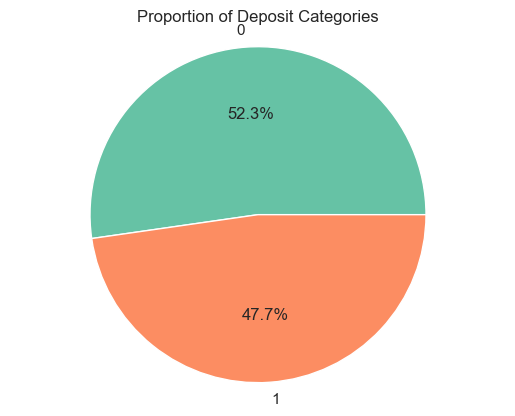

In [156]:
# Kalkulasi proporsi untuk masing masing kategori
deposit_proportions = (data['deposit'].value_counts() / len(data) * 100)

# Plot the pie chart
plt.pie(deposit_proportions, labels=deposit_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Deposit Categories')
plt.axis('equal') 
plt.show()

**Insight**

Proporsi Kategori tidak terlalu jauh perbedaanya
- No =52.2%
- Yes = 47.8%

Sehingga dikatakan kategori pada data ini tidak imbalance


**IDENTIFIKASI OUTLIER**

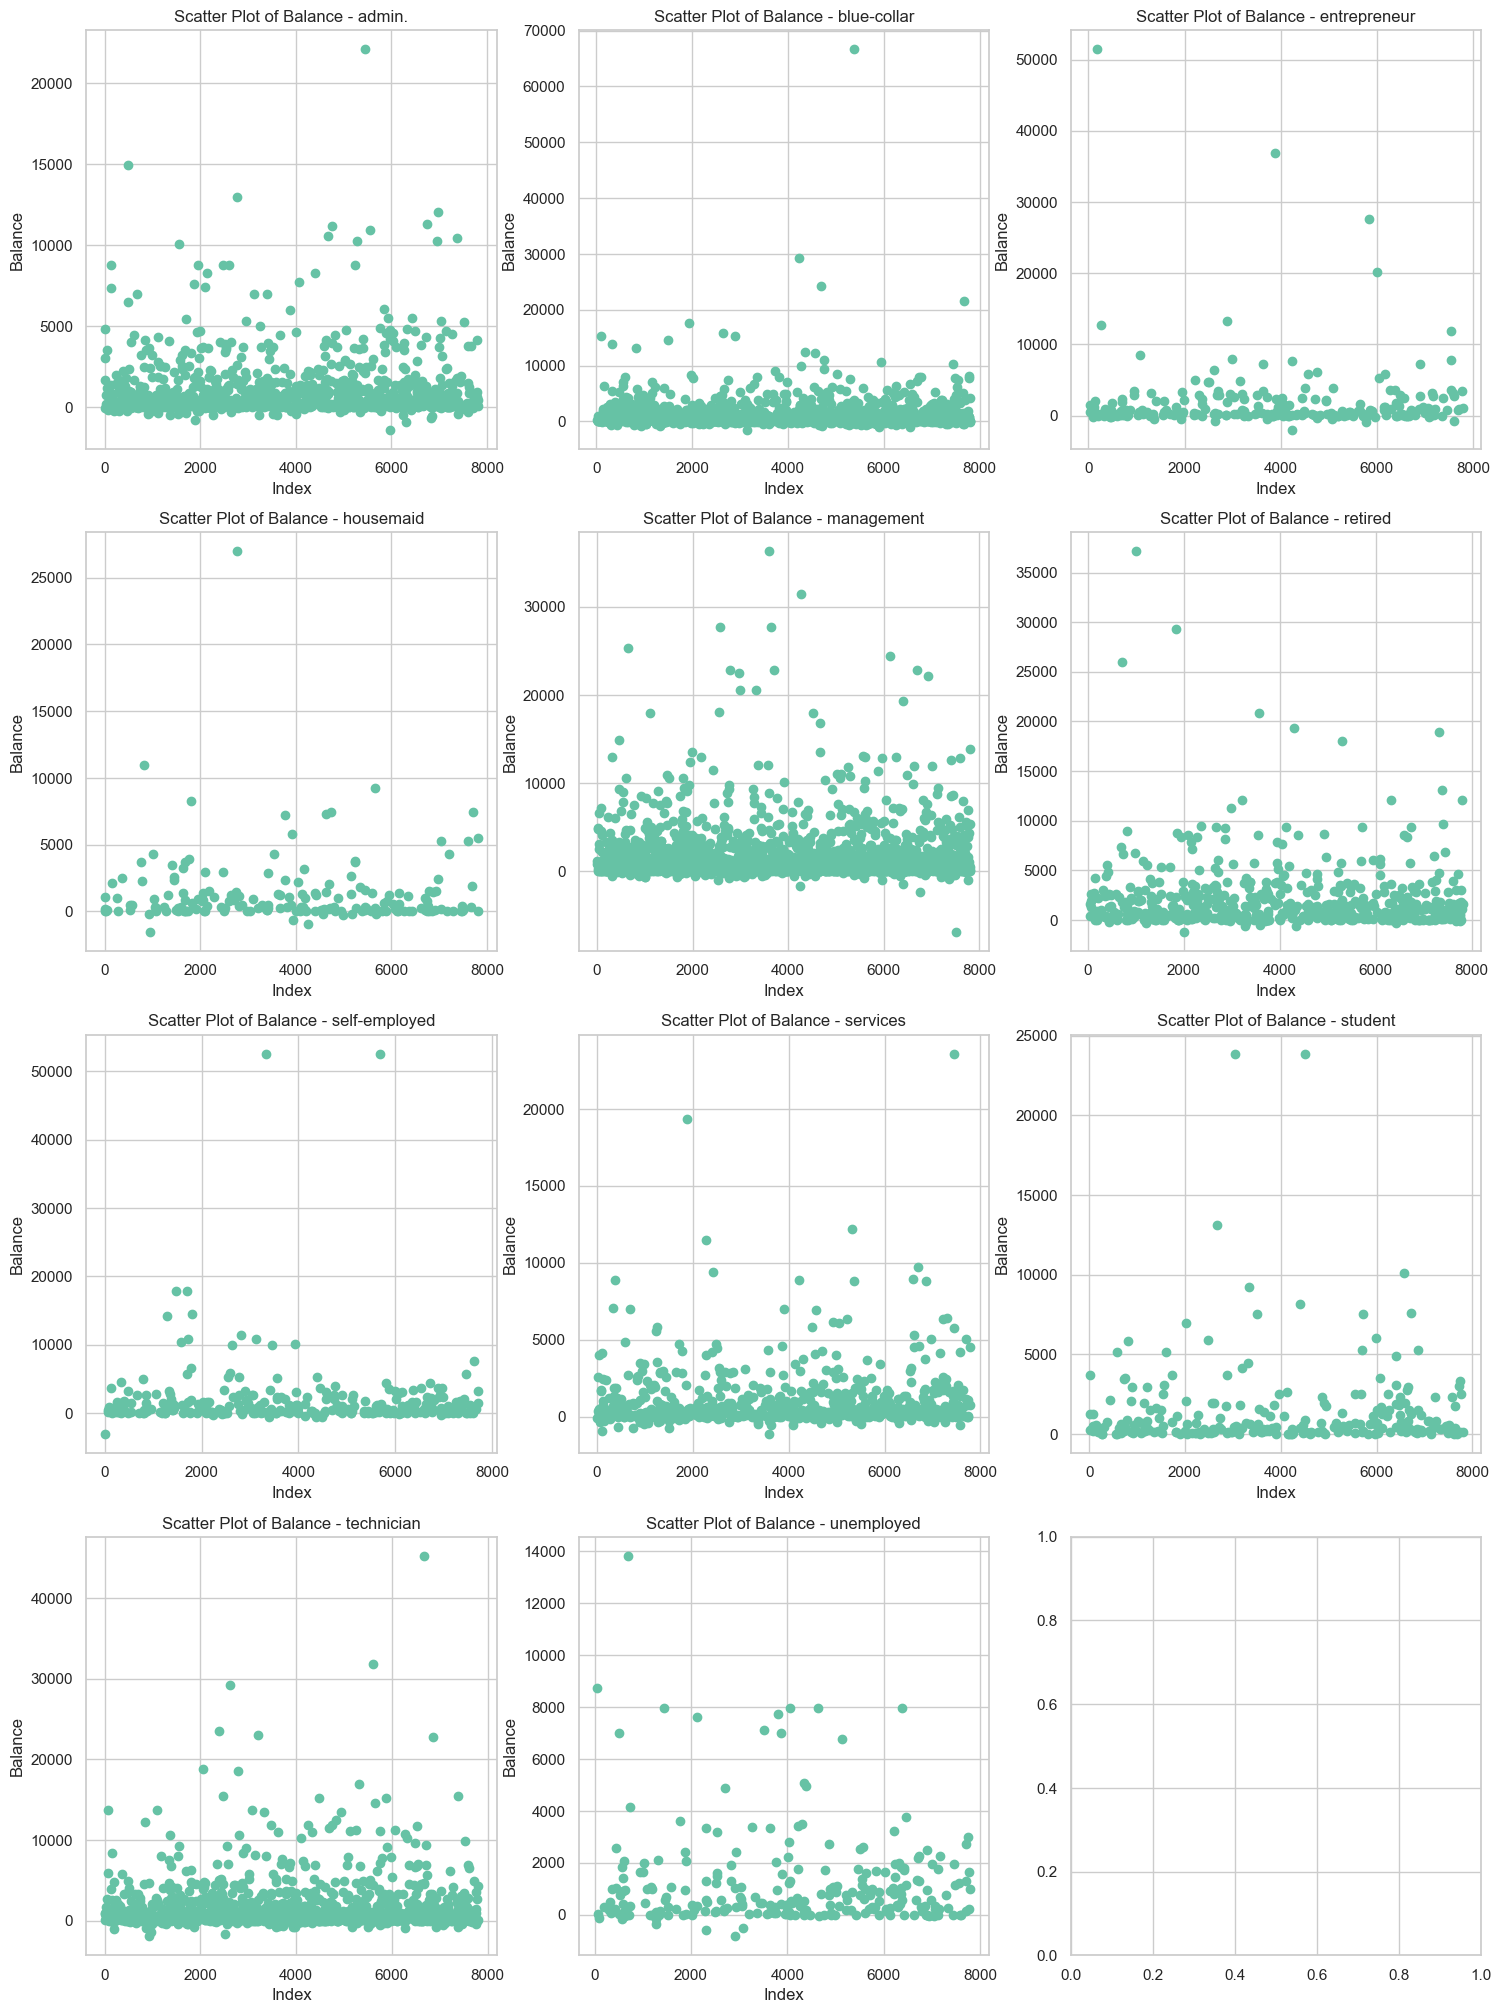

In [157]:
# Group data by job category
grouped_data = data.groupby('job')

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 3

# Create subplots with 11 individual scatter plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the job categories and create scatter plots
for i, (job_category, group) in enumerate(grouped_data):
    ax = axes[i]
    ax.scatter(group.index, group['balance'])
    ax.set_xlabel('Index')
    ax.set_ylabel('Balance')
    ax.set_title(f'Scatter Plot of Balance - {job_category}')
    ax.grid(True)  # Add grid to subplot

# Remove any unused subplots
if len(grouped_data) < len(axes):
    for j in range(len(grouped_data), len(axes)):
        fig


**Insight**

Jenis pekerjaan pada data ini adalah 11 macam, yang masing-masing jenisnya memiliki range saldo yang berbeda. Tetapi, dapat dilihat berdasarkan grafik scatter plot diatas, persebaran data saldo nya semuanya memiliki outlier yang sangat jauh dibandingkan dengan perkumpulan data yang lain. Apabila hal ini dibiarkan maka akan membingungkan sistem machine learning dikarenakan terdapat data minoritas yang memiliki karakteristik yang sangat berbeda jika dibandingkan dengan data kebanyakan.

**Tindakan:**

Untuk menangani hal ini, maka outlier-outlier tersebut yang sangat jauh dari persebaran data yang lain akan dihapuskan, namun handle outlier ini akan dilakukan per pekerjaan, tidak sekaligus, karena masing-masing jenis pekerjaan memiliki batas outlier yang belum tentu data outlier tersebut dikatakan outlier untuk jenis pekerjaan yang lain.

**HANDLE OUTLIER PEKERJAAN: ADMIN**

In [158]:
# Pada pekerjaan admin persebaran saldo nasabah berada pada kisaran <0 hingga +- 22000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 10000, 
# selain daripada itu akan dianggap outlier.
data_admin=data[(data['job']=='admin.')]
data_admin['balance'].value_counts().sort_index().tail(30)

balance
5310     1
5346     1
5426     1
5511     2
6005     1
6046     1
6512     1
6971     1
6979     1
6981     1
7336     1
7426     1
7608     1
7707     1
8304     2
8749     1
8781     2
8784     1
8785     1
10041    1
10250    2
10465    1
10541    1
10905    1
11174    1
11303    1
12039    1
12980    1
14968    1
22086    1
Name: count, dtype: int64

In [159]:
# Menghapus data outlier batas atas pada pekerjaan admin
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='admin.')&(data_admin['balance']>10000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'admin.') & (data_admin['balance'] > 10000)].index, inplace=True)

#Mengecek hasil drop
data_admin['balance'].value_counts().sort_index().tail(10)


Data yang teridentifikasi outlier ada sebanyak: 12


balance
10250    2
10465    1
10541    1
10905    1
11174    1
11303    1
12039    1
12980    1
14968    1
22086    1
Name: count, dtype: int64

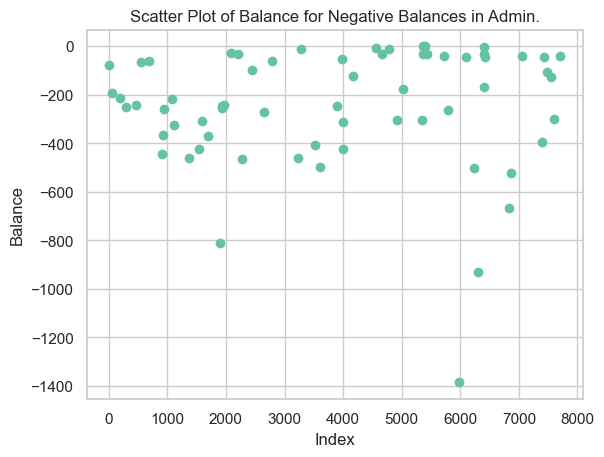

In [160]:
# Menghapus data outlier batas bawah pada pekerjaan admin, pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-300),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dab dihapus

data_admin_minus=data_admin[data_admin['balance']<0]

plt.scatter(data_admin_minus.index, data_admin_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in Admin.')
plt.grid(True)
plt.show()



In [161]:
#Jumlah data outlier batas bawah
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='admin.')&(data['balance']<-300)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'admin.') & (data['balance'] < -300)].index, inplace=True)

#Mengecek hasil drop
data_admin=data[(data['job']=='admin.')]
data_admin['balance'].value_counts().sort_index().head(10)

Data yang teridentifikasi outlier ada sebanyak: 23


balance
-273    1
-261    1
-257    1
-254    1
-249    1
-247    2
-244    1
-241    1
-218    1
-213    1
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: BLUE COLLAR**

In [162]:
# Pada pekerjaan blue collar persebaran saldo nasabah berada pada kisaran <0 hingga +- 66000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 12000, 
# selain daripada itu akan dianggap outlier.
data_blue_collar=data[data['job']=='blue-collar']
data_blue_collar['balance'].value_counts().sort_index().tail(20)

balance
8229     1
8403     1
8990     1
9328     1
9883     1
10252    1
10721    1
10984    1
12198    1
12519    1
13156    1
13849    1
14646    1
15341    2
15841    1
17672    1
21614    1
24277    1
29184    1
66653    1
Name: count, dtype: int64

In [163]:
# Menghapus data outlier batas atas pada pekerjaan blue collar
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='blue-collar')&(data_blue_collar['balance']>12000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'blue-collar') & (data_blue_collar['balance'] > 12000)].index, inplace=True)

#Mengecek hasil drop
data_blue_collar=data[(data['job']=='blue-collar')]
data_blue_collar['balance'].value_counts().sort_index().tail(10)

Data yang teridentifikasi outlier ada sebanyak: 13


balance
7944     1
8163     1
8229     1
8403     1
8990     1
9328     1
9883     1
10252    1
10721    1
10984    1
Name: count, dtype: int64

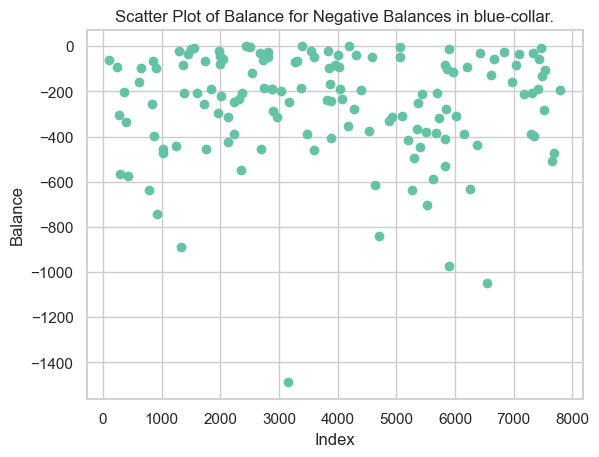

In [164]:
# Menghapus data outlier batas bawah pada pekerjaan blue-collar, pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-600),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dab dihapus

data_blue_collar_minus=data_blue_collar[data_blue_collar['balance']<0]

plt.scatter(data_blue_collar_minus.index, data_blue_collar_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in blue-collar.')
plt.grid(True)
plt.show()


In [165]:
#Jumlah data outlier batas bawah
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='blue-collar')&(data_blue_collar['balance']<-600)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'blue-collar') & (data_blue_collar['balance'] < -600)].index, inplace=True)

#Mengecek hasil drop
data_blue_collar=data[(data['job']=='blue-collar')]
data_blue_collar['balance'].value_counts().sort_index().head(10)

Data yang teridentifikasi outlier ada sebanyak: 11


balance
-588    1
-575    1
-565    1
-546    1
-529    1
-509    1
-493    1
-473    2
-461    1
-454    3
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: ENTREPRENEUR**

In [166]:
# Pada pekerjaan entrepreneur persebaran saldo nasabah berada pada kisaran <0 hingga +- 51000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 7000, 
# selain daripada itu akan dianggap outlier.
data_entrepreneur=data[(data['job']=='entrepreneur')]
data_entrepreneur['balance'].value_counts().sort_index().tail(20)

balance
4798     1
4872     1
4976     1
5315     1
5802     2
6188     1
6403     1
7264     1
7279     1
7641     1
7752     1
7944     1
8491     1
11887    1
12737    1
13342    1
20138    1
27624    1
36935    1
51439    1
Name: count, dtype: int64

In [167]:
# Menghapus data outlier batas atas pada pekerjaan blue collar
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='entrepreneur')&(data_entrepreneur['balance']>7000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'entrepreneur') & (data_entrepreneur['balance'] > 7000)].index, inplace=True)

#Mengecek hasil drop
data_entrepreneur=data[(data['job']=='entrepreneur')]
data_entrepreneur['balance'].value_counts().sort_index().tail(10)

Data yang teridentifikasi outlier ada sebanyak: 13


balance
3676    1
3904    2
4736    1
4798    1
4872    1
4976    1
5315    1
5802    2
6188    1
6403    1
Name: count, dtype: int64

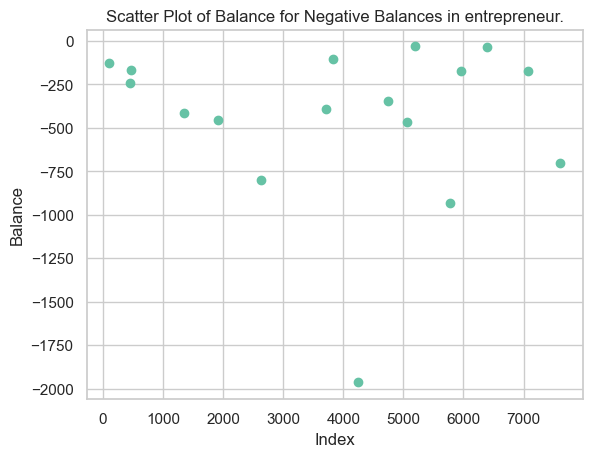

In [168]:
# Menghapus data outlier batas bawah pada pekerjaan entrepreneur, pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-250),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_entrepreneur_minus=data_entrepreneur[data_entrepreneur['balance']<0]

plt.scatter(data_entrepreneur_minus.index, data_entrepreneur_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in entrepreneur.')
plt.grid(True)
plt.show()


In [169]:
#Jumlah data outlier batas bawah
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='entrepreneur')&(data_entrepreneur['balance']<-250)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'entrepreneur') & (data_entrepreneur['balance'] < -250)].index, inplace=True)

#Mengecek hasil drop
data_entrepreneur=data[(data['job']=='entrepreneur')]
data_entrepreneur['balance'].value_counts().sort_index().head(10)

Data yang teridentifikasi outlier ada sebanyak: 9


balance
-242     1
-172     1
-170     1
-164     1
-124     1
-104     1
-34      1
-31      1
 0      22
 1       1
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: HOUSE MAID**

In [170]:
# Pada pekerjaan house maid persebaran saldo nasabah berada pada kisaran <0 hingga +- 26000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 6000, 
# selain daripada itu akan dianggap outlier.

data_housemaid=data[data['job']=='housemaid']
data_housemaid['balance'].value_counts().sort_index().tail(20)

balance
3680     1
3701     1
3706     1
3798     1
3923     1
4279     1
4312     1
4324     1
5260     1
5275     1
5473     1
5774     1
7195     1
7296     1
7433     1
7441     1
8278     1
9228     1
10943    1
26965    1
Name: count, dtype: int64

In [171]:
# Menghapus data outlier batas atas pada pekerjaan housemaid
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='housemaid')&(data_housemaid['balance']>6000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'housemaid') & (data_housemaid['balance'] > 6000)].index, inplace=True)

#Mengecek data setelah di drop
data_housemaid=data[data['job']=='housemaid']
data_housemaid['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 8


balance
2581    1
2645    1
2880    1
2929    1
2990    1
3151    1
3283    1
3512    1
3680    1
3701    1
3706    1
3798    1
3923    1
4279    1
4312    1
4324    1
5260    1
5275    1
5473    1
5774    1
Name: count, dtype: int64

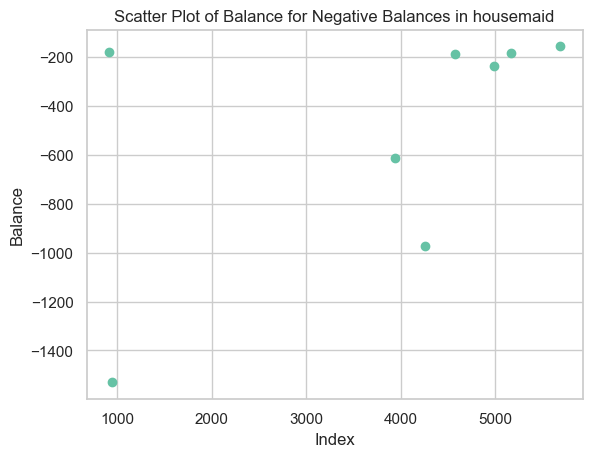

In [172]:
# Menghapus data outlier batas bawah pada pekerjaan house maid pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-200),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_housemaid_minus=data_housemaid[data_housemaid['balance']<0]

plt.scatter(data_housemaid_minus.index, data_housemaid_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in housemaid')
plt.grid(True)
plt.show()

In [173]:
# Menghapus data outlier batas bawah pada pekerjaan housemaid
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='housemaid')&(data_housemaid['balance']<-200)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'housemaid') & (data_housemaid['balance'] < -200)].index, inplace=True)

#Mengecek data setelah di drop
data_housemaid=data[data['job']=='housemaid']
data_housemaid['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 4


balance
-187     1
-184     1
-177     1
-156     1
 0      17
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: MANAGEMENT**

In [174]:
# Pada pekerjaan management persebaran saldo nasabah berada pada kisaran <0 hingga +- 36000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 20000, 
# selain daripada itu akan dianggap outlier.

data_management=data[data['job']=='management']
data_management['balance'].value_counts().sort_index().tail(20)

balance
13014    2
13054    1
13546    1
13578    1
13901    1
14930    1
16786    1
17964    2
18111    1
19358    1
20585    2
22125    1
22520    1
22815    1
22867    2
24450    1
25290    1
27696    2
31472    1
36252    1
Name: count, dtype: int64

In [175]:
# Menghapus data outlier batas atas pada pekerjaan management
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='management')&(data_management['balance']>20000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'management') & (data_management['balance'] > 20000)].index, inplace=True)

#Mengecek data setelah di drop
data_management=data[data['job']=='management']
data_management['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 13


balance
11528    1
11835    1
11891    2
12018    1
12026    1
12356    1
12569    1
12857    2
12956    1
12972    1
13014    2
13054    1
13546    1
13578    1
13901    1
14930    1
16786    1
17964    2
18111    1
19358    1
Name: count, dtype: int64

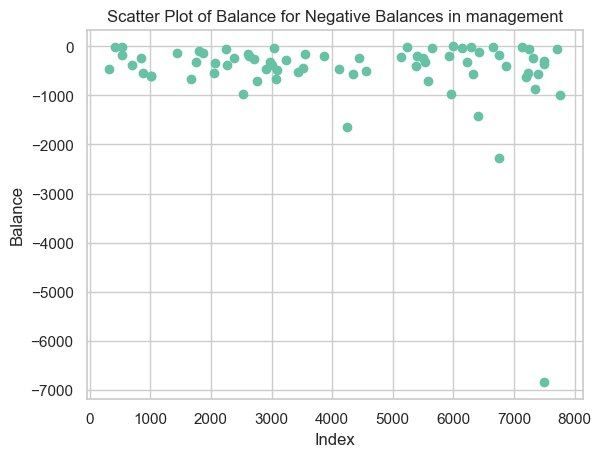

In [176]:
# Menghapus data outlier batas bawah pada pekerjaan management pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-1000),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_management_minus=data_management[data_management['balance']<0]

plt.scatter(data_management_minus.index, data_management_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in management')
plt.grid(True)
plt.show()

In [177]:
# Menghapus data outlier batas bawah pada pekerjaan management
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='management')&(data_management['balance']<-1000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'management') & (data_management['balance'] < -1000)].index, inplace=True)

#Mengecek data setelah di drop
data_management=data[data['job']=='management']
data_management['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 4


balance
-994    1
-974    1
-970    1
-861    1
-713    1
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: RETIRED**

In [178]:
# Pada pekerjaan retired persebaran saldo nasabah berada pada kisaran <0 hingga +- 37000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 10000, 
# selain daripada itu akan dianggap outlier.

data_retired=data[data['job']=='retired']
data_retired['balance'].value_counts().sort_index().tail(20)

balance
8556     2
8603     2
8648     1
8729     1
8919     1
9224     1
9367     4
9480     1
9676     1
11254    1
12067    2
12114    1
13094    1
18016    1
18967    1
19317    1
20806    1
25947    1
29340    1
37127    1
Name: count, dtype: int64

In [179]:
# Menghapus data outlier batas atas pada pekerjaan retired
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='retired')&(data_retired['balance']>10000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'retired') & (data_retired['balance'] > 10000)].index, inplace=True)

#Mengecek data setelah di drop
data_retired=data[data['job']=='retired']
data_retired['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 12


balance
6307    1
6422    1
6690    1
6746    1
6888    1
7132    1
7298    1
7613    1
7802    2
8121    1
8304    3
8556    2
8603    2
8648    1
8729    1
8919    1
9224    1
9367    4
9480    1
9676    1
Name: count, dtype: int64

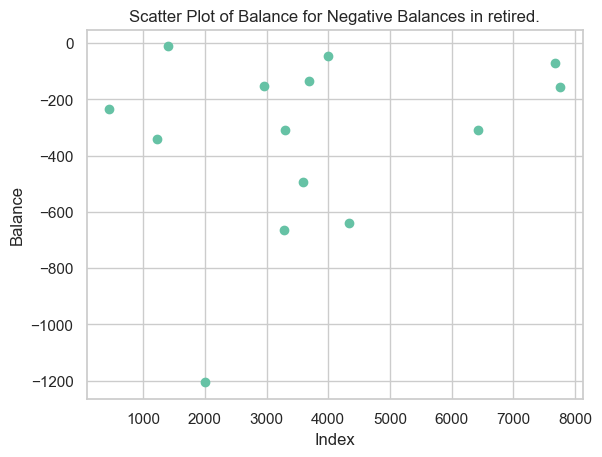

In [180]:
# Menghapus data outlier batas bawah pada pekerjaan retired pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-400),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_retired_minus=data_retired[data_retired['balance']<0]

plt.scatter(data_retired_minus.index, data_retired_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in retired.')
plt.grid(True)
plt.show()

In [181]:
# Menghapus data outlier batas bawah pada pekerjaan retired
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='retired')&(data_retired['balance']<-400)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'retired') & (data_retired['balance'] < -400)].index, inplace=True)

#Mengecek data setelah di drop
data_retired=data[data['job']=='retired']
data_retired['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 4


balance
-341    1
-309    2
-233    1
-157    1
-152    1
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: SELF EMPLOYED**

In [182]:
# Pada pekerjaan self-employed persebaran saldo nasabah berada pada kisaran <0 hingga +- 52000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 10000, 
# selain daripada itu akan dianggap outlier.

data_self_employed=data[data['job']=='self-employed']
data_self_employed['balance'].value_counts().sort_index().tail(20)

balance
4984     1
5214     1
5215     1
5312     1
5350     1
5679     1
5774     1
5810     1
6657     1
7602     1
9994     1
10005    1
10052    1
10346    1
10861    2
11494    1
14144    1
14522    1
17924    2
52587    2
Name: count, dtype: int64

In [183]:
# Menghapus data outlier batas atas pada pekerjaan self-employed
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='self-employed')&(data_self_employed['balance']>10000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'self-employed') & (data_self_employed['balance'] > 10000)].index, inplace=True)

#Mengecek data setelah di drop
data_self_employed=data[data['job']=='self-employed']
data_self_employed['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 12


balance
3676    1
3685    1
3695    1
3698    1
3717    1
3950    1
4418    1
4420    1
4579    1
4984    1
5214    1
5215    1
5312    1
5350    1
5679    1
5774    1
5810    1
6657    1
7602    1
9994    1
Name: count, dtype: int64

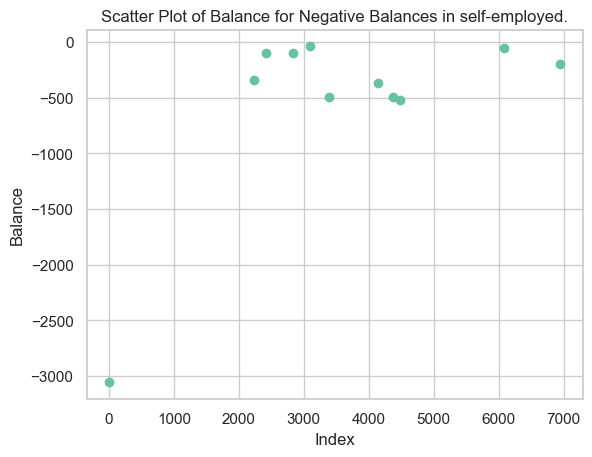

In [184]:
# Menghapus data outlier batas bawah pada pekerjaan self-employed pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-500),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_self_employed_minus=data_self_employed[data_self_employed['balance']<0]

plt.scatter(data_self_employed_minus.index, data_self_employed_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in self-employed.')
plt.grid(True)
plt.show()

In [185]:
# Menghapus data outlier batas atas pada pekerjaan self-employed
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='self-employed')&(data_self_employed['balance']<-500)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'self-employed') & (data_self_employed['balance'] < -500)].index, inplace=True)

#Mengecek data setelah di drop
data_self_employed=data[data['job']=='self-employed']
data_self_employed['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 2


balance
-497    2
-364    1
-341    1
-199    1
-94     2
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: SERVICES**

In [186]:
# Pada pekerjaan services persebaran saldo nasabah berada pada kisaran <0 hingga +- 23000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 10000, 
# selain daripada itu akan dianggap outlier.

data_services=data[data['job']=='services']
data_services['balance'].value_counts().sort_index().tail(20)

balance
5806     1
6089     1
6170     1
6332     1
6360     1
6374     1
6904     1
6983     1
7019     1
7066     1
8806     1
8837     1
8876     2
8918     1
9374     1
9713     1
11462    1
12223    1
19343    1
23592    1
Name: count, dtype: int64

In [187]:
# Menghapus data outlier batas atas pada pekerjaan services
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='services')&(data_services['balance']>10000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'services') & (data_services['balance'] > 10000)].index, inplace=True)

#Mengecek data setelah di drop
data_services=data[data['job']=='services']
data_services['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 4


balance
5293    1
5571    1
5781    1
5801    1
5806    1
6089    1
6170    1
6332    1
6360    1
6374    1
6904    1
6983    1
7019    1
7066    1
8806    1
8837    1
8876    2
8918    1
9374    1
9713    1
Name: count, dtype: int64

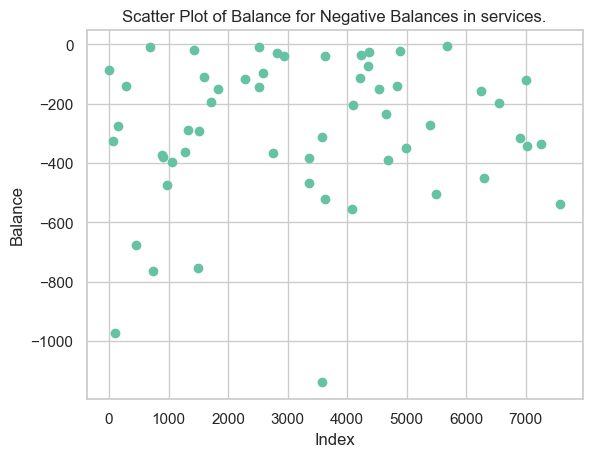

In [188]:
# Menghapus data outlier batas bawah pada pekerjaan services pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-600),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_services_minus=data_services[data_services['balance']<0]

plt.scatter(data_services_minus.index, data_services_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in services.')
plt.grid(True)
plt.show()

In [189]:
# Menghapus data outlier batas bawah pada pekerjaan services
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='services')&(data_services['balance']<-600)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'services') & (data_services['balance'] < -600)].index, inplace=True)

#Mengecek data setelah di drop
data_services=data[data['job']=='services']
data_services['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 5


balance
-553    1
-538    1
-522    1
-504    1
-475    1
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: STUDENTS**

In [190]:
# Pada pekerjaan student persebaran saldo nasabah berada pada kisaran <0 hingga +- 23000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 10000, 
# selain daripada itu akan dianggap outlier.

data_student=data[data['job']=='student']
data_student['balance'].value_counts().sort_index().tail(20)

balance
3511     2
3713     1
3733     2
4126     1
4468     1
4869     1
5169     2
5291     1
5296     1
5827     1
5916     1
6036     1
6991     1
7529     2
7585     1
8165     1
9216     1
10086    1
13107    1
23878    2
Name: count, dtype: int64

In [191]:
# Menghapus data outlier batas atas pada pekerjaan student
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='student')&(data_student['balance']>10000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'student') & (data_student['balance'] > 10000)].index, inplace=True)

#Mengecek data setelah di drop
data_student=data[data['job']=='student']
data_student['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 4


balance
3090    1
3300    1
3472    1
3511    2
3713    1
3733    2
4126    1
4468    1
4869    1
5169    2
5291    1
5296    1
5827    1
5916    1
6036    1
6991    1
7529    2
7585    1
8165    1
9216    1
Name: count, dtype: int64

**Tindakan Pada Batas Bawah**

Menghapus data outlier batas bawah pada pekerjaan student pada batas bawah hanya terdapat saldo 0, hal ini berdasarkan knowledge bukanlah termasuk outlier karena jika dia adalah student hal yang wajar untuk memiliki saldo di bank sebesar 0

**HANDLE OUTLIER PEKERJAAN: TECHNICIAN**

In [192]:
# Pada pekerjaan technician persebaran saldo nasabah berada pada kisaran <0 hingga +- 45000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 20000, 
# selain daripada itu akan dianggap outlier.

data_technician=data[data['job']=='technician']
data_technician['balance'].value_counts().sort_index().tail(20)

balance
11862    3
12264    1
12531    1
13410    1
13460    1
13658    1
13711    2
14533    1
15161    2
15474    1
15485    1
16992    1
18508    1
18777    1
22755    1
23076    1
23495    1
29207    1
31868    1
45248    1
Name: count, dtype: int64

In [193]:
# Menghapus data outlier batas atas pada pekerjaan technician
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='technician')&(data_technician['balance']>20000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'technician') & (data_technician['balance'] > 20000)].index, inplace=True)

#Mengecek data setelah di drop
data_technician=data[data['job']=='technician']
data_technician['balance'].value_counts().sort_index().tail(20)

Data yang teridentifikasi outlier ada sebanyak: 6


balance
11016    1
11115    2
11222    1
11262    1
11431    1
11766    1
11862    3
12264    1
12531    1
13410    1
13460    1
13658    1
13711    2
14533    1
15161    2
15474    1
15485    1
16992    1
18508    1
18777    1
Name: count, dtype: int64

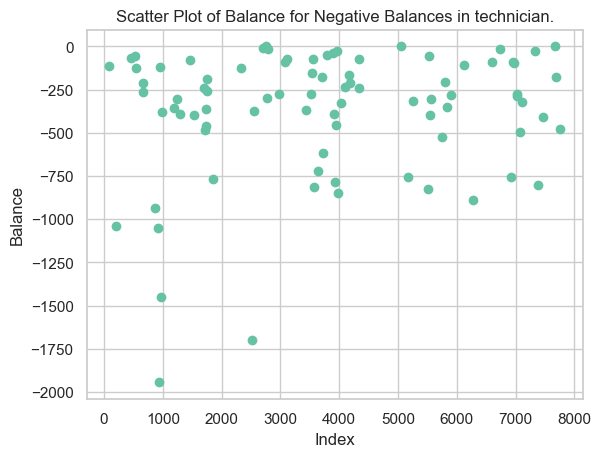

In [194]:
# Menghapus data outlier batas bawah pada pekerjaan technician pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-1000),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_technician_minus=data_technician[data_technician['balance']<0]

plt.scatter(data_technician_minus.index, data_technician_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in technician.')
plt.grid(True)
plt.show()

In [195]:
# Menghapus data outlier batas bawah pada pekerjaan technician
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='technician')&(data_technician['balance']<-1000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'technician') & (data_technician['balance'] < -1000)].index, inplace=True)

#Mengecek data setelah di drop
data_technician=data[data['job']=='technician']
data_technician['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 5


balance
-938    1
-888    1
-849    1
-824    1
-813    1
Name: count, dtype: int64

**HANDLE OUTLIER PEKERJAAN: UNEMPLOYED**

In [196]:
# Pada pekerjaan unemployed persebaran saldo nasabah berada pada kisaran <0 hingga +- 13000 namun persebaran data mayoritas banyak berkumpul pada range <0 - 10000, 
# selain daripada itu akan dianggap outlier.

data_unemployed=data[data['job']=='unemployed']
data_unemployed['balance'].value_counts().sort_index().tail(20)

balance
3229     1
3354     1
3357     1
3391     1
3430     1
3511     1
3611     1
3754     1
4145     1
4874     1
4969     1
5091     1
6748     1
7005     2
7105     1
7620     1
7724     1
7968     4
8725     1
13818    1
Name: count, dtype: int64

In [197]:
# Menghapus data outlier batas atas pada pekerjaan unemployed
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='unemployed')&(data_unemployed['balance']>10000)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'unemployed') & (data_unemployed['balance'] > 10000)].index, inplace=True)

#Mengecek data setelah di drop
data_unemployed=data[data['job']=='unemployed']
data_unemployed['balance'].value_counts().sort_index()

Data yang teridentifikasi outlier ada sebanyak: 1


balance
-825     1
-581     1
-505     1
-353     1
-165     1
        ..
 7105    1
 7620    1
 7724    1
 7968    4
 8725    1
Name: count, Length: 194, dtype: int64

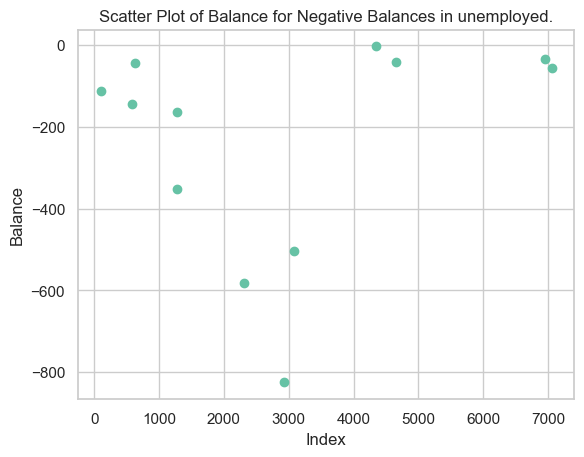

In [198]:
# Menghapus data outlier batas bawah pada pekerjaan unemployed pada batas bawah dapat dilihat persebaran data banyak berada pada titik (-1) - (-600),
# sehingga nilai yang berada dibawah batas bawah akan dianggap outlier dan dihapus

data_unemployed_minus=data_unemployed[data_unemployed['balance']<0]

plt.scatter(data_unemployed_minus.index, data_unemployed_minus['balance'])
plt.xlabel('Index')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance for Negative Balances in unemployed.')
plt.grid(True)
plt.show()

In [199]:
# Menghapus data outlier batas bawah pada pekerjaan unemployed
print(f"Data yang teridentifikasi outlier ada sebanyak: {data[(data['job']=='unemployed')&(data_unemployed['balance']<-600)]['balance'].count()}")

#Drop Outlier
data.drop(data[(data['job'] == 'unemployed') & (data_unemployed['balance'] < -600)].index, inplace=True)

#Mengecek data setelah di drop
data_unemployed=data[data['job']=='unemployed']
data_unemployed['balance'].value_counts().sort_index().head()

Data yang teridentifikasi outlier ada sebanyak: 1


balance
-581    1
-505    1
-353    1
-165    1
-144    1
Name: count, dtype: int64

# KLASIFIKASI MODEL MACHINE LEARNING

# Define X and Y

In [200]:
X=data.drop(columns=['deposit'])
y=data['deposit']

# Data Splitting

In [201]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=100,
    stratify=y
)

# Preprocessing

**Binary encoder:**
Pada kolom job dan month memiliki nilai lebih dari 5 sehingga encoder yang sesuai adalah binary.
1. Job
2. Month

**One Hot Encoder:**
Pada kolom housing, loan, contact, dan poutcome memilkiki jenis nilai kurang dari 5
1. Housing
2. Loan
3. Contact
4. Poutcome


**Robust Scalar**
Pemilihan robust pada sistem ini adalah agar scaler tidak terlalu sensitif jikalau data ini masih memiliki outlier
1. Balance
2. Age
3. Campaign
4. Pdays


In [202]:
# # define polynomial
# poly = PolynomialFeatures(degree=3)

In [203]:
# pipe_poly_scaling=Pipeline([
#     ('poly',PolynomialFeatures(degree=3)),
#     ('Scaling',RobustScaler())
# ])

Sebelumnya polynomial features digunakan untuk menangkap hubungan non-linear yang lebih baik dalam data, namun setelah digunakan hasil f2 score nya malah lebih rendah daripada yang tanpa menggunakan polynomial feature, itulah mengapa polynomial feature tidak digunakan dalam model ini.

In [205]:
# Transformer
numeric_columns=['age','balance','campaign','pdays']
transformer=ColumnTransformer([
    ('binary',BinaryEncoder(),['month','job']),
    ('ohe',OneHotEncoder(),['housing','loan','contact','poutcome']),
    ('scaler', RobustScaler(), numeric_columns),
    ],remainder='passthrough')

In [206]:
# # Transformer
# numeric_columns=['balance']
# transformer=ColumnTransformer([
#     ('binary',BinaryEncoder(),['job']),
#     ('ohe',OneHotEncoder(),['housing','loan','contact','poutcome']),
#     ('poly', pipe_poly_scaling, numeric_columns),
#     ],remainder='passthrough')

In [207]:
data['month'].value_counts()

month
may    1924
aug    1045
jul    1010
jun     838
apr     643
nov     625
feb     522
oct     275
jan     222
sep     203
mar     194
dec      66
Name: count, dtype: int64

In [208]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(), ['month', 'job']),
                                ('ohe', OneHotEncoder(),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('scaler', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

# MODEL BENCHMARKING: CROSS VALIDATION

In [209]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm=SVC()




In [210]:
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.metrics import make_scorer, fbeta_score

In [211]:
# buat scoring f2 score (recall lebih penting dari pada precision, tapi tetap memperhatikan keduanya)
f2 = make_scorer(fbeta_score, beta=2)

In [212]:
# Voting

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('c1f1', logreg),
    ('c2f2', knn),
    ('c3f3', dt)
], voting='soft')


#Stacking

stacking=StackingClassifier(
    estimators=[
    ('c1f1',logreg),
    ('c2f2',knn),
    ('c3f3',dt),
    ],
    final_estimator=logreg
)

rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()


In [213]:
models = [logreg,knn,dt,rf,xgb,lgbm,svm,stacking,voting]

list_all=[]
list_mean=[]
list_std=[]


# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
for i in models:
    pipe_model=Pipeline(
        [
            ('preprocessing',transformer),
            ('modelling',i)
        ]
    )

    cv_score=cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=f2
    )

    list_all.append(cv_score.round(2))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())


In [214]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': list_mean,
    'std': list_std,
    'all': list_all
})

df_cv.sort_values('mean',ascending=False)

,algo,mean,std,all
3,RandomForestClassifier(),0.638375,0.012497,"[0.64, 0.62, 0.65, 0.65, 0.64]"
7,"StackingClassifier(estimators=[('c1f1', Logist...",0.637047,0.014784,"[0.66, 0.62, 0.63, 0.65, 0.62]"
4,"XGBClassifier(base_score=None, booster=None, c...",0.632704,0.021325,"[0.67, 0.6, 0.63, 0.63, 0.64]"
5,LGBMClassifier(),0.629400,0.013897,"[0.64, 0.61, 0.64, 0.62, 0.64]"
0,LogisticRegression(),0.624124,0.023540,"[0.67, 0.6, 0.62, 0.63, 0.6]"
8,"VotingClassifier(estimators=[('c1f1', Logistic...",0.621212,0.013797,"[0.64, 0.63, 0.61, 0.63, 0.6]"
6,SVC(),0.612373,0.014843,"[0.62, 0.58, 0.62, 0.62, 0.62]"
2,DecisionTreeClassifier(),0.606394,0.019381,"[0.63, 0.61, 0.62, 0.58, 0.59]"
1,KNeighborsClassifier(),0.605340,0.012189,"[0.62, 0.6, 0.6, 0.59, 0.62]"


# Hyperparameter Tuning for the first best model (Random Forest)

**RANDOM SEARCH**

In [215]:
# scaler
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

In [216]:
# hyperparameter untuk RF Classifier
hyperparametersRF = {
    'algo__n_estimators': [100, 200, 300],
    'algo__max_depth': [None, 5, 10],
    'algo__min_samples_split': [2, 5, 10],
    'algo__min_samples_leaf': [1, 2, 4],
    'algo__max_features': ['sqrt', 'log2'],
    'algo__bootstrap': [True, False],
    'algo__random_state': [42],
    'prep__scaler': [minmax, standard, robust]          # ... kombinasi model dengan hyperparameter berbeda 
}

# pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('algo', rf)                  # benchmark model terpilih
])

# Define Random Search
random_search = RandomizedSearchCV(
    estimator=pipe_model,           # model  
    param_distributions=hyperparametersRF,    # hyperparameter yang mau dituning
    cv=5,                           # jumlah fold  
    scoring=f2,                   # metrics
    n_jobs=-1,                    # pakai semua processor
    random_state=500,
    n_iter=200                 # jumlah kombinasi hyperparameter yang akan difitting
)

In [218]:
# fitting 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['month',
                                                                                'job']),
                                                                              ('ohe',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['age',
                                                                                'balance',
                                                                                'campaign',
                                                                                'pdays'])])),
                                             ('algo',
                                              RandomForestClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_...{'algo__bootstrap': [True, False],
                                        'algo__max_depth': [None, 5, 10],
                                        'algo__max_features': ['sqrt', 'log2'],
                                        'algo__min_samples_leaf': [1, 2, 4],
                                        'algo__min_samples_split': [2, 5, 10],
                                        'algo__n_estimators': [100, 200, 300],
                                        'algo__random_state': [42],
                                        'prep__scaler': [MinMaxScaler(),
                                                         StandardScaler(),
                                                         RobustScaler()]},
                   random_state=500, scoring=make_scorer(fbeta_score, beta=2))

In [219]:
# score terbaik
random_search.best_score_ 

0.6482912328680575

In [220]:
# hyperparameter terbaik
random_search.best_params_

{'prep__scaler': RobustScaler(),
 'algo__random_state': 42,
 'algo__n_estimators': 100,
 'algo__min_samples_split': 5,
 'algo__min_samples_leaf': 1,
 'algo__max_features': 'sqrt',
 'algo__max_depth': None,
 'algo__bootstrap': False}

In [221]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['month', 'job']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('scaler', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('algo',
                 RandomForestClassifier(bootstrap=False, min_samples_split=5,
                                        random_state=42))])

In [222]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['month', 'job']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('scaler', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model', RandomForestClassifier())])

## **8. Predict to Test Set**

- Melakukan prediksi pada test set dengan menggunakan model terbaik dan hyperparameter terbaik.
- Membandingkan performa model sebelum tuning dan setelah tuning.


### Before Tuning

In [223]:
# define model
model = RandomForestClassifier()

pipe_model = Pipeline([
    ('prep', transformer), 
    ('model', model)])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark = pipe_model.predict(X_test)
fbeta_score(y_test, y_pred_benchmark, beta=2)

0.6441543700340521

### After Tunning

In [224]:
# menggunakan model terbaik hasil random_search
model = random_search.best_estimator_
model.fit(X_train, y_train)

y_pred_randomizedsearch = model.predict(X_test)
fbeta_score(y_test, y_pred_randomizedsearch, beta=2)

0.6453880764904386

## OPTIMIZE THRESHOLD

In [225]:
# pipeline
pipe_model = random_search.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.02, 1.00, 0.01)
list_f2 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1 

    # f1 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2)) 

In [226]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2'] = list_f2

df_th.head()

,threshold,f2
0,0.02,0.820624
1,0.03,0.815838
2,0.04,0.816187
3,0.05,0.814781
4,0.06,0.815880


In [227]:
df_th.sort_values(['f2','threshold'], ascending=[False, True]).head(3)

,threshold,f2
0,0.02,0.820624
2,0.04,0.816187
5,0.07,0.816020


In [228]:
best_threshold = df_th.sort_values(['f2','threshold'], ascending=[False, True]).head(3).iloc[0,0]
best_threshold

0.02

In [229]:
# Modeling dengan Best Threshold

# pipeline
pipe_model = random_search.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]            # hasil prediksi dalam bentuk probability
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # yg probability-nya di atas 0.24 masuk ke kelas 1

# f1
fbeta_score(y_test, y_pred_optimized, beta=2)

0.8206237195538355

**INSIGHT**

Hasil yang didapat setelah melakukan hyperparameter tunning adalah hanya sebesar 64%, hasil ini belum termasuk hasil maksimlah dikarenakan kurang dari 80%.
Itulah sebabnya dilakukan uji coba optimasi threshold yang mungkin akan menaikan hasil score nya, namun setelah dilakukan uji threshold, hasil terbaiknya berada pada nilai threshold 0.01. Nilai tersebut tidak dapat digunakan, dikarenakan model akan sangat timpang kesalah satu kategori dan tidak bisa memprediksi kategori yang lain.

Jadi, uji threshold tidak dapat digunakan.



## SUMMARY

**Performa Decision Tree pada Train Set**

In [234]:
print(df_cv.loc[3, 'mean'].round(4), 'Score Benchmark (sebelum hyperparameter tuning)')
# print(gridsearch.best_score_.round(4), 'Score Model hasil GridSearch (setelah hyperparameter tuning)')
print(random_search.best_score_.round(4), 'Score Model hasil RandomizedSearch (setelah hyperparameter tuning)') 

0.6384 Score Benchmark (sebelum hyperparameter tuning)
0.6483 Score Model hasil RandomizedSearch (setelah hyperparameter tuning)


**Performa Decision Tree pada Test Set**

In [231]:
print(fbeta_score(y_test, y_pred_benchmark, beta=2).round(4), 'Score Benchmark (sebelum hyperparameter tuning)')
# print(f1_score(y_test, y_pred_gridsearch).round(4), 'Score Model hasil GridSearch (setelah hyperparameter tuning)')
print(fbeta_score(y_test, y_pred_randomizedsearch, beta=2).round(4), 'Score Model hasil RandomizedSearch (setelah hyperparameter tuning)')


0.6442 Score Benchmark (sebelum hyperparameter tuning)
0.6454 Score Model hasil RandomizedSearch (setelah hyperparameter tuning)


### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model Random Forest kita

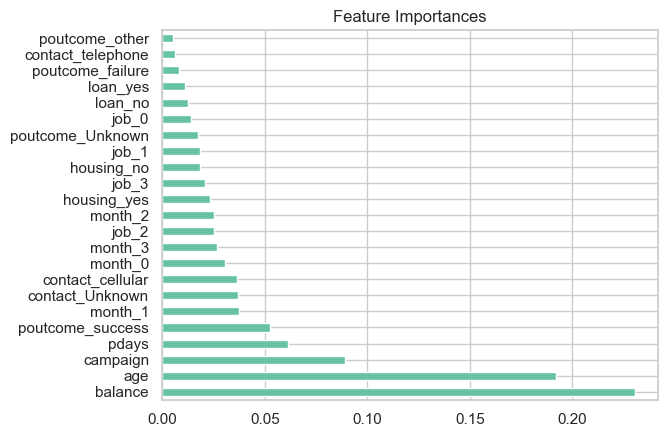

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature importances and sort them
importances = best_model['algo'].feature_importances_
feature_names = []

# Retrieve feature names from the transformed columns
for transformer in transformer.transformers_:
    if hasattr(transformer[1], 'get_feature_names_out'):
        feature_names.extend(transformer[1].get_feature_names_out())
    else:
        # If the transformer doesn't have 'get_feature_names_out', use the original column names
        feature_names.extend(transformer[2])

# Create a pandas Series with feature importances and corresponding feature names
coef1 = pd.Series(importances, feature_names).sort_values(ascending=False)

# Plot the feature importances
coef1.plot(kind='barh', title='Feature Importances')
plt.show()


**INSIGHT**

Dari keseluruhan feature yang terdapat pada data, ternyata yang memiliki nilai fearure importance yang besar hanya ada 5 feature yang lebih besar dari 0.05. 
Padahal nilai "feature importance" dalam model Random Forest menggambarkan seberapa besar pengaruh suatu fitur terhadap prediksi model. Nilai yang lebih besar menunjukkan bahwa fitur tersebut memiliki kontribusi yang lebih signifikan dalam mempengaruhi hasil prediksi. Jika hanya sedikit feature importance yang memiliki nilai tinggi maka feature tidak dapat memberikan kepada pembelajaran mesin dan akan menyebabkan kebingungan karena tidak adanya pola yang terbentuk dari feature terhadap nilai target.

Itulah alasan mengapa hasil nilai f2 score pada model klasifikasi ini sangat rendah yaitu sebesar 64%.

## CONFUSION MATRIX

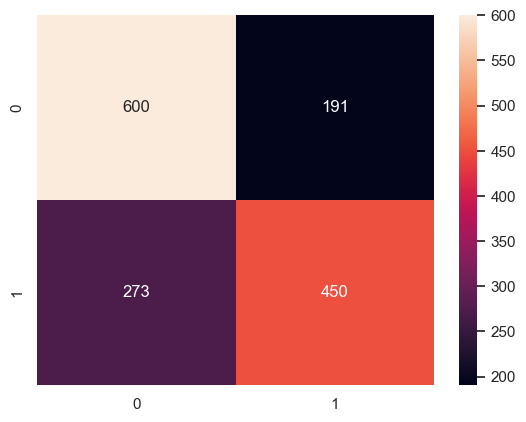

In [ ]:
# Model sebelum tuning
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='g');

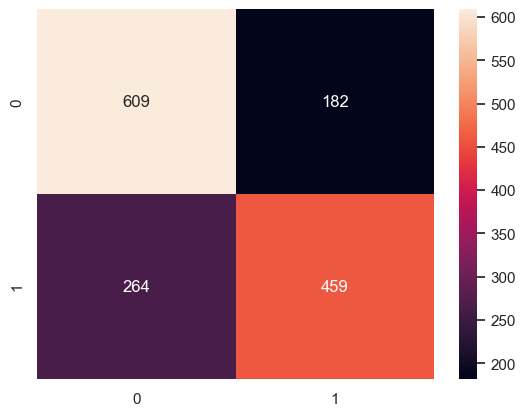

In [ ]:
# Model setelah tuning
sns.heatmap(confusion_matrix(y_test, y_pred_randomizedsearch), annot=True, fmt='g');

**INSIGHT**

Model metrik sebelum dilakukan tunning:

- TN=609
- TP=454
- FN=273
- FP=191

Model matrik setelah dilaukan tunning:
- TN=609
- TP=459
- FN=264
- FP=182

Pada saat metrik setelah di tunning nilai true positif semakin besar hal ini berakibat pada model yang semakin benar memprediksi nasabah yang akan mengambil deposito

## CONCLUSION & RECOMENDATION

In [236]:
y_pred_tuned = best_model.predict(X_test)
report_tuned = classification_report(y_test, y_pred_tuned)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.69      0.74      0.71       791
           1       0.69      0.63      0.66       723

    accuracy                           0.69      1514
   macro avg       0.69      0.69      0.69      1514
weighted avg       0.69      0.69      0.69      1514



**CONCLUSION**

HASIL MODEL MACHINE LEARNING:

Pada kasus bank marketing campaign dengan menggunakan model klasifikasi hasil yang didaptkan dengan metrik f2 score hanya mendapatkan score sebesar 64%, hasil tersebut sebenarnya kurang bagus untuk mengetahui model tersebut dapat mengukur seberapa tepat nilai false negatif yang merupakan fokus utama pada kasus ini. 
Walaupun dalam proses nya seluruh elemen telah digunakan untuk memperbesar nilai f2 score seperti handle missing value per kolom, handle outlier per jenis pekerjaan, menggunakan polynomial feature, tunning menggunakan berbagai hyperparam, hingga mencoba berbagai optimisize threshold.

1. Kinerja dalam menangani false negatives: Dalam konteks bank marketing campaign, false negatives merujuk pada nasabah yang sebenarnya berpotensi untuk mengambil deposito berjangka tetapi tidak terdeteksi sebagai calon nasabah yang tepat. Dalam kasus ini, model berhasil meminimalkan false negatives sebesar 64%, yang berarti masih ada sejumlah nasabah potensial yang terlewatkan.

2. Pengurangan jumlah nasabah yang tidak perlu dihubungi: Model mampu mengurangi 74% nasabah yang tidak perlu dihubungi untuk ditawarkan deposito berjangka. Hal ini menunjukkan kemampuan model dalam memprediksi dengan benar nasabah yang tidak berminat untuk mengambil deposito berjangka.

3. Identifikasi nasabah yang perlu dihubungi: Model berhasil mengidentifikasi 63% nasabah yang perlu dihubungi untuk ditawarkan deposito berjangka. Ini menunjukkan kemampuan model dalam mengenali nasabah yang berpotensi tertarik dan dapat memberikan kontribusi positif terhadap marketing campaign.

**RECOMENDATION**

1. Potensi peningkatan kinerja model: Model telah melibatkan berbagai elemen seperti penanganan missing value, outlier, penggunaan polynomial feature, tuning hyperparameter, dan optimize threshold, salain itu terdapat ruang untuk perbaikan lebih lanjut dalam meningkatkan F2 score dan kinerja model secara keseluruhan. Dengan cara menjelajahi metode penanganan ketidakseimbangan kelas, mencoba model yang berbeda, atau melakukan analisis lebih lanjut terhadap fitur-fitur yang digunakan.

2. Pentingnya evaluasi dan pengujian lanjutan: Selain F2 score, perlu mempertimbangkan metrik evaluasi lain seperti akurasi, presisi, dan recall secara keseluruhan untuk mendapatkan pemahaman yang lebih lengkap tentang kinerja model. Evaluasi lebih lanjut dan pengujian dengan menggunakan teknik validasi silang atau dataset uji yang terpisah juga penting untuk memastikan kehandalan dan generalisasi model pada data yang belum terlihat sebelumnya.

3. Penambahan jumlah fitur: Dibutuhkan penambahan feature pada sistem ini, katena feature yang ada hanya sebagian yang memiliki nilai feature importance yang tinggi